<a href="https://colab.research.google.com/github/Nikniknikm/Laboration_1/blob/master/Kopia_av_Laboration3_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 3 part 1 Regression

In this part of laboratory 3 you will perform some different types of regression analysis on a dataset with weather data. Feel free to watch the lecture videos for lecture 6 that goes through regression (part 2 and 4 are most important). 

In the laboratory, only questions that have a **Q** in front should be answered (You may have to do some coding to be able to answer the question in some cases while in others there is only theoretical questions.). 


Tasks that are not questions but only coding are marked with **C**, these are also mandatory.

Example:

**Q** How many men and women have answered the survey? (Here it is preferable to do some coding to easily find the answer.)

**C** Encode a function that calculates the 20 most common words in your data set.

*When we correct the laboration we will not look specifically on how you did your coding to answer questions, but look at whether the answer is correct or not when it comes to questions marked with **Q** .*

**This part of the laboration will be corrected by Soraya (and Elin) and therefore you need to write your answers in English!**

**You are expected to add code blocks or text (markdown) blocks when needed. Make sure to use enough cells to make you code easy to read i.e. try to only make one thing in each cell.**

An initial import of a few of the required libraries is already coded, below. When you need other libraries you can add them in this cell or in the cell where you need them further in the lab. 

In [7]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data

Start by: 
**C** Importing our dataset and store it in a suitable format with the name `weather_data`. 

In [27]:
# Import our WeatherData and store it in the variable weather_data 
weather_data = pd.read_csv("WeatherData_lab3.csv", sep=";")
# Display the data in the notebook
weather_data.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Sunshine,Cloud,RainToday,Visibility (km)
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,No,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,No,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,No,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,No,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,No,15.8263


## Exploratory analysis
 

**Q** What type of data is in the dataset? (HINT! dtype and type of variable: categorial/continous) 

**Q** How many rows and columns, number of datapoints?

**Q** How do you interpret the different columns, write a short sentence that describes each column.

**C** Rename columns that have unsuitable names for the columns or if the columns have names that are difficult to interpret. (IF everything looks good, you don't need to do anything here)

**C** Code suitable visualisations that show the relationship between the different variables in the dataset (in two dimensions). Include labels on x and y axis and display a legend for the visualisation(s). You can choose if you want to visualise each relationship in its own plot or if you want to plot all relationships in one visualisation, if you choose the latter, you need to make it possible to distinguish between the different variables.

**Q** What kinds of relationship can you see between the different variables? 


 **Q1-**INT(Numeric data) 

In [ ]:
#Q2-
weather_data.count
#ANSWER: 50 rows and 8 columns, 8 datapoints

**Q3-** Temperature: Shows daily temp in form of int, wind speed: Shows the wind speed in km/h in form of int, Pressure: Shows daily pressure in form of int, Humidity: Shows how much it is humidity in form of int, Sunshine: if it has been sunny or not, Cloud: if it has been cloudy in form of int, (how many cloud has been visible in the sky), RainToday: true/false if it has rained, visibility: in form of int, how long can you see in km

In [ ]:
#C4- Rename columns
#ANSWER: Columns name are easy to interpret and i choosed to keep it as it is.

In [ ]:
#C5-
sns.pairplot(weather_data)

**Q6-** I can see that tempreture and winde speed have a realation witch shows that as the temperature increase, the wind speed increase too. There is also realtionship between temperature and humidity witch shows that humidity sinks as tempereture sinks.


## Data cleaning and feature engineering

**Q** Are there any missing values? If yes, what is your interpretation of the reason(s) and what type of missing values? (HINT! MCAR;MAR;NMAR)

**C** Handle any missing values in a suitable way (if there are none, you don't need to do anything here). Make sure you changes are saved in you dataframe.

**Q** Are there any variables that need further cleaning/feature engineering such as changing dtype/calculations to improve categorial features etc? 

**Q** IS there a need fo standardization/normalization or scaling of variables? Why/why not? (Motivate for each of them)

**C** If yes on any of the above, fix this column and make sure to make the changes on your existing dataframe.



**Q1-** Yes in "sunshine","cloud" and "RainToday"columns.
Sunshine column miss values and it can depend on that they have forgot to collect data.
Cloud column miss some values and it can depend on that it has been difficult to collect data.
RainToday column miss some values and it can depend on that they forgot to collect data.
MCAR : Missing completely at random
MAR: Missing at random
MNAR: Missing not at random




In [28]:
#C 2- Handle missing values

weather_data.drop(['Sunshine','Cloud','Visibility (km)'], axis = 1, inplace=True)

#I choosed to drop sunshine, cloud and visibility (km) columns because the value is not important for this analys

In [ ]:
weather_data.head()

**Q3-**  RainToday values need to be changed from string to int. Because the algorithms can perform better. So i will assign unique numeric value to a string value in Pandas DataFrame.

**Q4-** **Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

**Standardization** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

*(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)*

I think that normalization can be good to use when you know that the distribution of the data does not follow a Gaussian distribution, but i don´t think that this is necessary for this data.

In [ ]:
#C 5- String to int (RainToday)

weather_data.sort_values('RainToday',inplace= True)
#Replace yes to 1
weather_data.RainToday[weather_data.RainToday == 'Yes'] = 1
#Replace no to 2
weather_data.RainToday[weather_data.RainToday == 'No'] = 2
#Replace NA to 0
weather_data = weather_data.fillna(0) 


In [ ]:
weather_data

## Linear Regression

### Your first task in regards to modeling is to do a simple linear regression, using only two of the variables present in the dataset.

To help you further the codeblock below show a heatmap of the correlation between the different varaibles. Also, another codeblock show a pairplot that visualize the relationsship between pairwise variables, it is coded using the seaborn library.



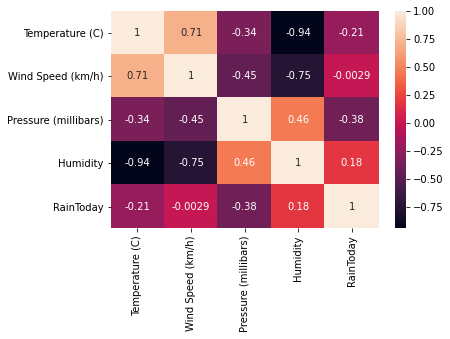

In [39]:
#seaborn heatmap
corrMatrix = weather_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

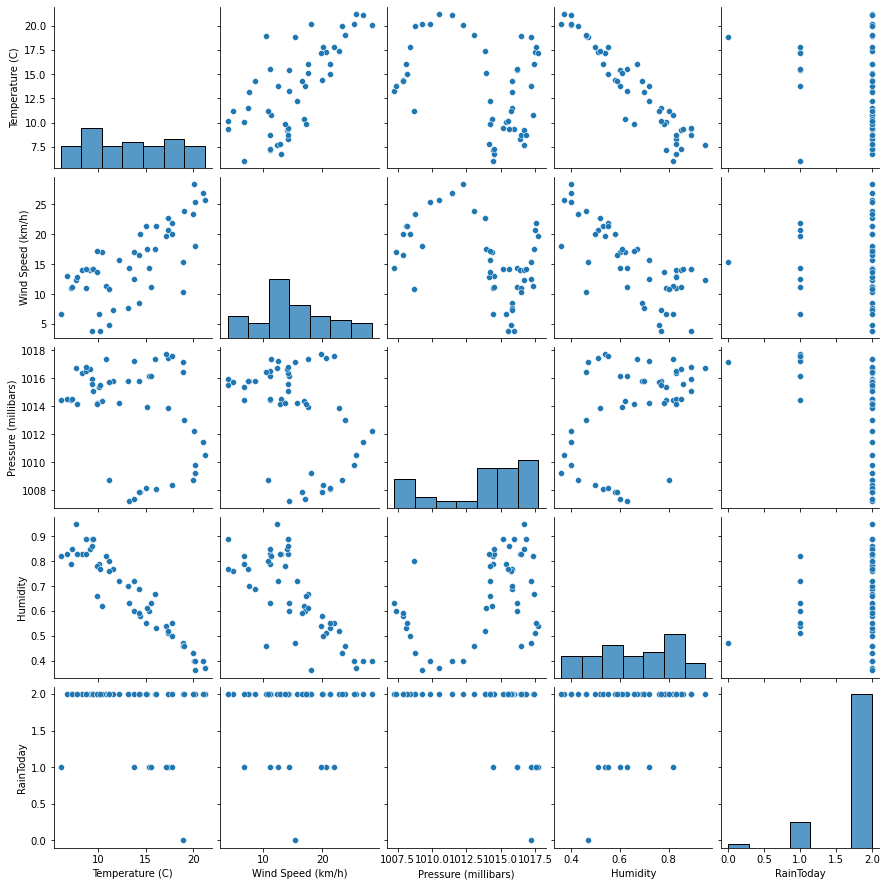

In [40]:
#seaborn pairplot
sns.pairplot(weather_data)

**Q** Based on the heat map and your visualisations on relationships, which two variables (one for input (x) and another for output (y) would you consider most appropriate for doing a linear regression analysis? 

HINT! THe table below (from [this page](https://www.statology.org/what-is-a-strong-correlation/))helps you interpret the heatmap. **A must in a linear regression model is to have a linear relationship between the variables!**

r in the table below is the Pearson correlation coefficient that pandas calculate for us (Note that it it the absolut value of r, the correclation coefficent can be both negative and positive). Also see [pandas documentation on correlation calculations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

| Absolute value of r    | Strength of relationship|        
|------------------------|-------------------------|
| r < 0.25               |No relationship          |
| 0.25 < r < 0.5         |Weak relationship        |
| 0.5 < r < 0.75         |Moderate relationship    |
| r > 0.75               |Strong relationship      |


**Q** Which column should represent the independent variable, x, and the dependent variable, y (the one you want to predict). In order to get the best possible prediction of y? 
Motivate your answer

**C** Investigate if there are any outliers in the two variables you have chosen, if so, handle them in a suitable way. 

**Q** Why did you choose to handle/not handle the outliers in the two variables?

**Q 1-** Temp and humidity, because they have strong relationship that is +0.75.

**Q 2-** x should be temperature and y should be humidity because humidity is depended on temperature

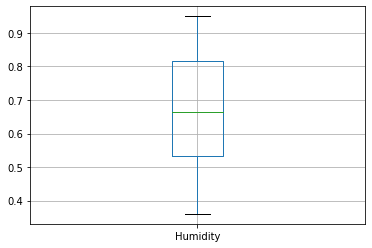

In [54]:
#C3- Outliers

weather_data.boxplot(column =['Humidity']) 

#No outliners to handle

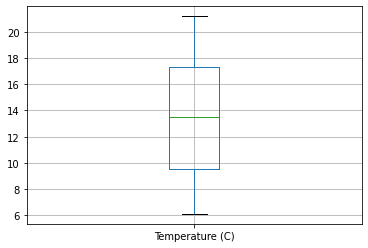

In [57]:
#C3- Outliers

weather_data.boxplot(column =['Temperature (C)']) 

#No outliners to handle

**Q 4-** Based on boxplot results there is no outliers to handle, so i choose to keep it as it is.

### Modeling

**C** Assign the correct values to x and y in the codeblock provided below. (NOTE! You should call values().reshape() on x because scikit_learn requires input to be in the form of two dimensional arrays i.e. a numpy array (created by pandas.values() in 2D ()created by numpy.reshape()). Or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. See also [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and [scikit_learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

The code already visible below imports the correct scikit_learn model (LinearRegression) in order to perform the training. Further, code is provided that performs the splitting of data into training and test and also performs the training on the trainingdataset and prediction on both the test and training datasets. 

**Q** What does the last three lines in the codeblock below do?

In [223]:
#C1- Correct values to x and y

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Insert the correct x and y 

x = weather_data.iloc[:, :1]

y= weather_data['Humidity']


#Split into traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#train
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

#Predict (here done on both test and traingset)
y_pred_train =lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1


(1.1248008758119692, array([-0.03454794]))

**Q2-** Make two new variable theta_0 and theta_1 where
 theta_0 is the lowest value in trained models.
theta_1 is the value that is higher than the other values in trained models.
 And then we write out values of theta_0 and theta_1

**C** Create a new dataframe with two columns, one with the actual values in the testset and one with the predicted values on the testset. 

**Q**What is your interpretation of the correctness of your model?

In [224]:
#C3- New dataframe with two columns

df_compare = pd.DataFrame({"Test": y_test, "Pred": y_pred_test})
df_compare

,Test,Pred
7,0.89,0.821739
40,0.40,0.429812
31,0.83,0.855327
46,0.58,0.626543
1,0.86,0.801586
25,0.66,0.782392
48,0.60,0.648999
0,0.89,0.797555
33,0.72,0.702548
19,0.70,0.670687


**Q 4-** Value of the test data is the rounded value of the pred data.

**C** Code a visualization that show the result (the straight line created by fitting your model to your training data) in relation to the trainingset and another visualization that show the result in relation to the testset. Use one code cell for each coding.

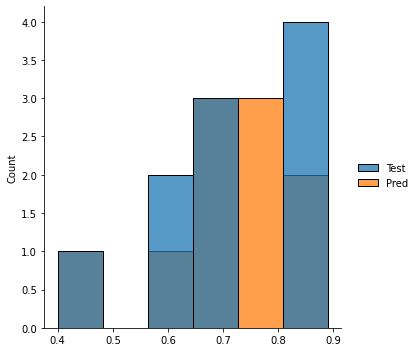

In [225]:
#C5- Code for visualising traningdata and trained model

sns.displot(df_compare)
plt.show()


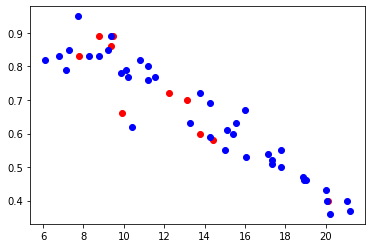

In [226]:
#C6- Code for visualising testdata and trained model

plt.scatter(x_test, y_test,  color='red')
plt.scatter(x_train, y_train, color='blue')
plt.show()


**Q** What do the two above visualisation show?

**Q** Why do we still predic using the training data and not the test data when visualising the result on the testset?

**Q** What is the preformance measures of your model? Calculate MSE, R^2 and MRSE on both test and trainingdata using skikit_learn and interpret the result.

See scikit_learn library: [MSE/MRSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), #Evaluate on trainingset[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)

**Q7-** First visualisation shows that the test data has higher value than pred data.
The second visualisation shosw that data is collected where the value is 2.

**Q8-**Because training data is there to build up a model, while testdata is to validate the model built.

In [227]:
#C9- MSR training data
from sklearn.metrics import mean_squared_error

mse_training = mean_squared_error(x_train, y_train)
mse_training

194.06701647552805

In [228]:
#C9- MSR test data

mse_test = mean_squared_error(x_test, y_test)
mse_test

138.31491986132525

In [229]:
#C9- RMSE training data
import math

rmse_training = math.sqrt(mse_training)
rmse_training

13.930793820724217

In [230]:
#C9- RMSE test data 

rmse_test = math.sqrt(mse_test)
rmse_test

11.760736365607608

In [231]:
#C9- R^2 training data
from sklearn.metrics import r2_score

r2_score(x_train, y_train)

-8.682037789655372

In [232]:
#C9- R^2 test data

r2_score(x_test, y_test)

-10.341949476119437

There is something strange about our r2_score, it is higher on the testset compared to the trainingset. This is against what we have learned, that models always perform better on trainingset compared to testset.

**Q** Why might that be? 

**Q** What can we do to make it better?

**Q 10-** I think that it can depends on that the model fits our data badly or i did not set an intercept.

**Q 11-** We can make a better model.

In order to see how or model performs we can also build a distribution plot of the actual values and the predicted values, this is done in the code below. 

**Q** Interpret the curves, what does it tell about the performance of the model?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


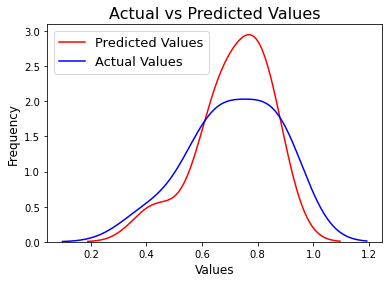

In [233]:
sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

**Q 12-** The model shows that our actual values is lower than the predicted values. Actual values is 


## Multiple linear regression

### Your next task in regards to modeling is to perform a multiple linear regression in order to predic the same y.

**Q** What varaibles from your dataset are appropriate to add to x to have more variables as input? Why?

**C** Perform a multiple linear regression in a similar fashion as you did while performing the simple linear regression, start by assigning appropriate columns to X and y (y should be the same as in the simple linear regression).

*It is preferable to use other names for your variables so as not to create confusion or overwrite variables by misstake.*

**C** Evaluate your model using the same measurements as for the simple linear regression.

**C** Create a visualization that show the difference between real values and predicted values on testdata (see simple linear regression visualization).

**Q** Why is it difficult to create a visualization that show the result on training and testdata, similar to the ones we did in the simple linear regression above?

**Q** How do the models differ? Which one is better than the other? Why?

*To answer the questions and do the required coding, please use one codeblock per question to facilitate the checking of your assignment.*

**Q1**- Wind speed, because if we look at the earlier pairplot, we se that Wind spped values have a relation to temperature and it is appropriate to add to x.

In [244]:
#Assign variables to X and y 
x_ml = weather_data.iloc[:, 1:2]
y= weather_data['Humidity']


In [245]:
#Split the dataset in train and test
x_ml_train, x_ml_test, y_ml_train, y_ml_test = train_test_split(x_ml, y, test_size=0.2, random_state=42)


In [246]:
#Train using trainingset and predict using testset
lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(x_ml_train, y_ml_train)

y_ml_pred_train =lr_model.predict(x_ml_train)
y_ml_pred_test = lr_model.predict(x_ml_test)


theta_0 = lm_model.intercept_
theta_1 = lm_model.coef_
theta_0, theta_1


(0.9525803380037673, array([-0.02007598]))

In [ ]:
#Evaluate


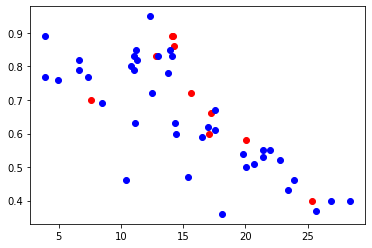

In [247]:
#Visualize the difference between real values and predicted values on testdata
plt.scatter(x_ml_test, y_ml_test,  color='red')
plt.scatter(x_ml_train, y_ml_train, color='blue')
plt.show()